In [1]:
BASE_URL = "http://localhost:8000"


In [2]:
# Get a complete task:
import httpx
from intern import array

/Users/mateljk1/Documents/projects/aplbrain/bossypaints/server/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
task_location = httpx.get(f"{BASE_URL}/api/tasks").json()['tasks'][0]

In [20]:
y_min_res

117

In [ ]:
raw_array = array(
    f"bossdb://{task_location['collection']}/{task_location['experiment']}/{task_location['channel']}", resolution=task_location["resolution"]
)

y_min_res = task_location["y_min"]
y_max_res = task_location["y_max"]
x_min_res = task_location["x_min"]
x_max_res = task_location["x_max"]
img = raw_array[
    0:16,
    y_min_res:y_max_res,
    x_min_res:x_max_res
]

seg_array = array(
    f"bossdb://{task_location['destination_collection']}/{task_location['destination_experiment']}/{task_location['destination_channel']}", resolution=task_location["resolution"]
)

seg_img = seg_array[
    0:16,
    y_min_res:y_max_res,
    x_min_res:x_max_res
]

/Users/mateljk1/Documents/projects/aplbrain/bossypaints/server/.venv/lib/python3.11/site-packages/intern/convenience/array.py:922: ImportWarning: CloudVolume is not installed. Accessing channel using CVDB.
  warnings.warn(


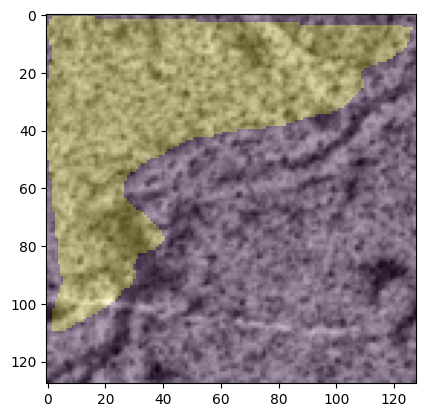

In [49]:
import matplotlib.pyplot as plt
plt.imshow(img[-1], cmap='gray')
plt.imshow(seg_img[-1], cmap='viridis', alpha=0.25, vmin=0, vmax=1, interpolation='none')

In [11]:
import numpy as np

np.min(img), np.max(img)

(VolumeCutout(0, dtype=uint8), VolumeCutout(0, dtype=uint8))